In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns


In [2]:
with open('primed_qtable.json', 'r') as file:
    data = json.load(file)

In [3]:
data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6
0,0.908832,0.632865,0.754355,0.131332,0.261000,0.587933,0.813336
1,0.879323,0.628857,0.168897,0.663778,0.246444,0.789004,0.134791
2,0.334240,0.449153,0.947759,0.126786,0.840174,0.440331,0.206896
3,0.612232,0.373153,0.876354,0.966170,0.973391,0.323629,0.086457
4,0.199857,0.461085,0.566765,0.011177,0.895251,0.518883,0.862547
...,...,...,...,...,...,...,...
86523,0.923931,0.243870,0.366834,0.655526,0.971573,0.631631,0.338836
86524,0.515563,0.516071,0.007166,0.154917,0.272750,0.301325,0.874332
86525,0.333816,0.390491,0.391401,0.148568,0.018229,0.169856,0.520045
86526,0.955335,0.392079,0.481521,0.244775,0.433256,0.954293,0.424013


In [4]:
import pickle
granularity = 4.0
HEIGHT= int(26*granularity)
WIDTH = int(26*granularity)
def load_qtable(filename="qtable.pkl"):
    with open(filename, "rb") as f:
        qtable = pickle.load(f)
    return qtable

q_table = load_qtable(filename="qtable_bad.pkl")

In [5]:
q_table

,0,1,2,3,4,5,6
0,0.245589,0.880742,0.994718,0.829550,0.827268,0.231982,0.003292
1,0.986605,0.192890,0.521556,0.488514,0.309206,0.743136,0.242673
2,0.472676,0.474736,0.936500,0.718687,0.250897,0.611363,0.457867
3,0.836573,0.822766,0.746119,0.145049,0.947192,0.712223,0.264575
4,0.054973,0.222345,0.563886,0.543354,0.271783,0.298669,0.862715
...,...,...,...,...,...,...,...
86523,0.785527,0.623090,0.119969,0.066620,0.946356,0.096488,0.285015
86524,0.968994,0.565456,0.866744,0.091342,0.841839,0.889902,0.383938
86525,0.708860,0.569441,0.791770,0.420859,0.036054,0.608886,0.702493
86526,0.130885,0.756838,0.705398,0.909844,0.957233,0.429982,0.661703


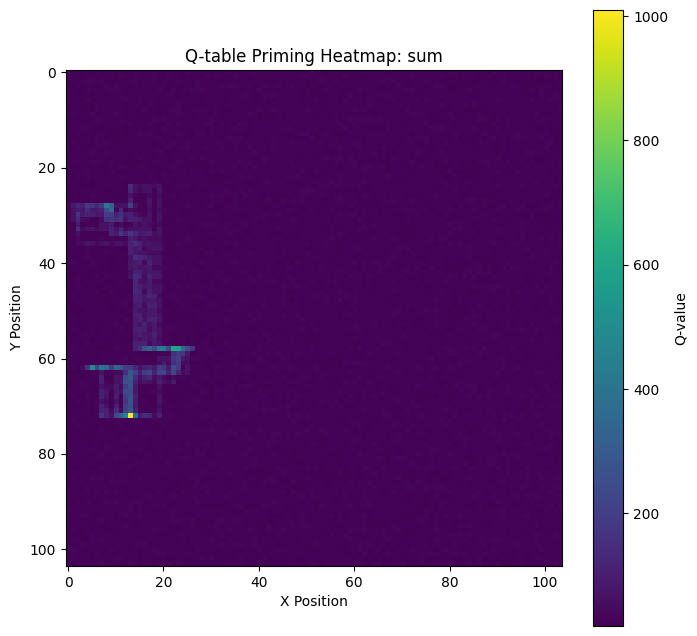

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_qtable_heatmap(qtable, mode="sum"):
    collapsed = np.zeros((HEIGHT, WIDTH))

    #encoding: ((((x,y)*2 + cart)*2 + items)*2 + checkout)

    for x in range(HEIGHT):
        for y in range(WIDTH):
            cell_value = 0
            # binary has_cart
            for cart in [0, 1]:
                # binary has_items
                for items in [0, 1]:
                    # binary has_checkour
                    for checkout in [0, 1]:
                        idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)

                        if mode == "sum":
                            cell_value += qtable.loc[idx].sum() #sum of actions
                        elif mode == "max":
                            cell_value += qtable.loc[idx].max() #max of actions
                        else:
                            raise ValueError("mode wrong")

            collapsed[x, y] = cell_value

    plt.figure(figsize=(8, 8))
    plt.imshow(collapsed.T, origin="lower", aspect="equal")
    plt.colorbar(label="Q-value")
    
    ax = plt.gca()
    ax.invert_yaxis()

    plt.title(f"Q-table Priming Heatmap: {mode}")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

plot_qtable_heatmap(qtable=q_table, mode="sum")


In [7]:
append()

NameError: name 'append' is not defined

In [ ]:
def max_heatmap_cell(qtable, mode="sum"):
    collapsed = np.zeros((HEIGHT, WIDTH))

    # compute collapsed heatmap \
    for x in range(HEIGHT):
        for y in range(WIDTH):
            cell_value = 0
            for cart in [0, 1]:
                for items in [0, 1]:
                    for checkout in [0, 1]:
                        idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)

                        if mode == "sum":
                            cell_value += qtable.loc[idx].sum()
                        elif mode == "max":
                            cell_value += qtable.loc[idx].max()
                        else:
                            raise ValueError("mode wrong")

            collapsed[x, y] = cell_value

    max_flat_idx = np.argmax(collapsed)
    max_x, max_y = np.unravel_index(max_flat_idx, collapsed.shape)
    max_value = collapsed[max_x, max_y]

    print("\n Highest Heatmap Cell")
    print(f"Location: (x={max_x}, y={max_y})")
    print(f"Collapsed Value: {max_value:.4f}\n")

    print("Q-values for all substates within this cell:")
    for cart in [0, 1]:
        for items in [0, 1]:
            for checkout in [0, 1]:
                idx = ((((max_x*HEIGHT + max_y)*2 + cart)*2 + items)*2 + checkout)
                qvals = qtable.loc[idx].values
                qvals = np.array(qvals, float)
                print(f"State (cart={cart}, items={items}, checkout={checkout}), idx={idx}")
                print(f"Q-values: {qvals}")
                print()

max_heatmap_cell(q_table)



=== Highest Heatmap Cell ===
Location: (x=13, y=72)
Collapsed Value: 1009.7470

=== Q-values for all substates within this cell ===
State (cart=0, items=0, checkout=0) → idx=11392
  Q-values: [3.81746608e-01 2.05749493e+01 4.20119812e+02 2.08227296e+01
 5.37672065e-01 1.98683775e-01 2.20395849e+02]

State (cart=0, items=0, checkout=1) → idx=11393
  Q-values: [0.96893192 0.957317   0.45426313 0.27809953 0.15094571 0.08855842
 0.6612241 ]

State (cart=0, items=1, checkout=0) → idx=11394
  Q-values: [0.51779118 0.84900416 0.77543192 0.7626587  0.87838221 0.52912243
 0.41528264]

State (cart=0, items=1, checkout=1) → idx=11395
  Q-values: [0.4240869  0.13343531 0.73623956 0.95919438 0.21337103 0.99760152
 0.50830106]

State (cart=1, items=0, checkout=0) → idx=11396
  Q-values: [  0.49187094 160.49869753   0.24831876  40.96542085   0.26656718
   0.53567701 100.85535648]

State (cart=1, items=0, checkout=1) → idx=11397
  Q-values: [0.25224276 0.02777667 0.62918135 0.13460492 0.65015096 0.56